## Assignment Week 7 - Biswajit Sharma

#### Part 1: PCA and Variance Threshold in a Linear Regression

Import the housing data as a data frame and ensure that the data is loaded properly.

In [11]:
# import modules

import pandas as pd
import unicodedata
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score, root_mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold, chi2, SelectKBest
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
# Set up display options
pd.options.display.max_columns=80
pd.options.display.max_rows=50
pd.options.display.max_colwidth=80

In [13]:
# read the dataset into a dataframe
df = pd.read_csv("./datasets/train.csv")

In [14]:
# view train rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Drop the "Id" column and any features that are missing more than 40% of their values.

In [15]:
#drop the Id column
df = df.drop(columns="Id")

In [16]:
# shape of datafarme
df.shape

(1460, 80)

In [17]:
# number of rows in dataframe
num_rows = df.shape[0]

# create a list of columns with > 40% missing values
column_with_high_number_missing_values = [row[0] for row in (df.isna().sum()).items() if row[1]/num_rows > 0.4]

#drop such columns
df = df.drop(columns=column_with_high_number_missing_values)

In [18]:
# view few rows
df.shape

(1460, 74)

For numerical columns, fill in any missing data with the median value.

In [23]:
#check columns that have missing values at this point
s = df.isna().sum() > 0
s[s != False]

BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
GarageType      True
GarageFinish    True
GarageQual      True
GarageCond      True
dtype: bool

In [19]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

we see only integer and object datatype

In [20]:
# select numerical datatypes using pandas select_dtypes function
numerical_columns = df.iloc[0:,0:-1].select_dtypes(include="number").columns.to_list()

In [24]:
#replace missing values in numerical columns with median value
for col_name in numerical_columns:
    median = df[col_name].median()
    df[col_name] = df[col_name].fillna(median)

For categorical columns, fill in any missing data with the most common value (mode).

In [25]:
# select categorical columns using pandas select_dtypes function
categorical_columns = df.select_dtypes(include="object").columns.to_list()

In [30]:
#replace missing values in categorical columns with mode i.e. most frequent value
for col_name in categorical_columns:
    mode = df[col_name].mode()
    df[col_name] = df[col_name].fillna(mode[0])

In [31]:
#check there are no column with missing values
s = df.isna().sum() > 0
s[s != False]

Series([], dtype: bool)

We see that there are no more columns with any NaN values 

Convert the categorical columns to dummy variables.

In [32]:
#using pandas get_dummies to encode categorical variables to numerical variables
df_with_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype="int")

In [33]:
# view few rows
df_with_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Split the data into a training and test set, where the SalePrice column is the target.

In [34]:
# define feature and target names
target = "SalePrice"
features = [cols for cols in df_with_dummies.columns if cols != "SalePrice"]

In [35]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_with_dummies[features], df_with_dummies[target], test_size=0.2, random_state=1
)

In [65]:
#number of features in original train set
features_train.shape[1]

229

Run a linear regression and report the R2-value and RMSE on the test set.

In [36]:
#create linear regression object
linear_reg1 = LinearRegression()

In [37]:
#fit training data
model1 = linear_reg1.fit(features_train, target_train)

In [38]:
# get predicted values for test set
predicted_target_test = model1.predict(features_test)

In [39]:
# calculate R squared
print(f"Test R2: {r2_score(target_test, predicted_target_test)}")

Test R2: 0.6425170408926663


In [40]:
# claulate RMSE 
print(f"Test RMSE: {root_mean_squared_error(target_test, predicted_target_test)}")

Test RMSE: 50493.05122911538


Fit and transform the training features with a PCA so that 90% of the variance is retained.

In [41]:
# using PCA to extarct feature keeping 90% variance
pca = PCA(n_components=0.90, whiten=True)

In [42]:
# fit the PCA
pca.fit(features_train)

PCA(n_components=0.9, whiten=True)

In [43]:
# extarct features in training set
features_train_pca = pca.transform(features_train)

How many features are in the PCA-transformed matrix?

In [44]:
print(f"Number of Features in transformed matrix: {features_train_pca.shape[1]}")

Number of Features in transformed matrix: 1


Transform but DO NOT fit the test features with the same PCA.

In [45]:
# apply PCA to test features
features_test_pca = pca.transform(features_test)

Repeat step 7 with your PCA transformed data.

In [48]:
# fit a linear regression model
linear_reg2 = LinearRegression()
model2 = linear_reg2.fit(features_train_pca, target_train)

In [49]:
# predict the target in test set
target_test_pca = model2.predict(features_test_pca)

In [50]:
# calculate R squared
print(f"Test R2: {r2_score(target_test, target_test_pca)}")

Test R2: 0.04870547852903828


In [51]:
# claulate RMSE 
print(f"Test RMSE: {root_mean_squared_error(target_test, target_test_pca)}")

Test RMSE: 82368.55383900611


Take your original training features (from step 6) and apply a min-max scaler to them.

In [52]:
#fir min max scaler to original features
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(features_train)

MinMaxScaler()

In [53]:
# apply min max scaler to train set
features_train_scaled = min_max_scaler.transform(features_train)

Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [54]:
# define a variance threshold for feature selection having variance > 0.1
variance_threshold = VarianceThreshold(threshold=0.1)

In [55]:
# fit the varince selector
variance_threshold.fit(features_train_scaled)

VarianceThreshold(threshold=0.1)

In [56]:
# apply variance selector to select features in train set
features_train_vt = variance_threshold.transform(features_train_scaled)

Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [57]:
# apply min max scaler to test set
features_test_scaled = min_max_scaler.transform(features_test)

In [59]:
# select test feature using the varince selector
features_test_vt = variance_threshold.transform(features_test_scaled)

In [64]:
#number of features after selection
features_test_vt.shape[1]

40

Repeat step 7 with the high variance data.

In [60]:
# fit a linear regression model
linear_reg3 = LinearRegression()
model3 = linear_reg3.fit(features_train_vt, target_train)

In [61]:
# predict the target in test set
target_test_vt = model3.predict(features_test_vt)

In [62]:
# calculate R squared for test set
print(f"Test R2: {r2_score(target_test, target_test_vt)}")

Test R2: 0.5528930998957041


In [63]:
# claulate RMSE for test set
print(f"Test RMSE: {root_mean_squared_error(target_test, target_test_vt)}")

Test RMSE: 56468.939203755304


#### Summary

$R^2$ is highest when all the features are used in modeling. $R^2$ reduced significantly to $0.048$ when _PCA_ was used to extarct features using 90% threshold, which resulted in only one feature to fit the linear regression model. This makes sense because as one feature can only account for much small amout variance in the target as compared to when more number of features are used. When feature selection method is used to select feature having greater than $0.1$, then $40$ features were selected and we observe that the $R^2$ again goes up to $0.552$ but still little less than the $R^2$ of the model ($0.642$) when all of the $229$ feature were used. It may not necessarily mean that the model with all features is much better fit just because $R^2$ is higher than the model when $40$ features were used because, the model with less number of features may have less complexity and hence lower variance and might perform well with unseen data.

$RMSE$ is lowest when all the features are used in modeling. $RMSE$ increased significantly to $82368$ when _PCA_ was used to extarct features keeping 90% threshold, which resulted in only one feature to fit the linear regression model. This makes sense because as one feature may have caused high bias compared to when more number of features are used. When feature selection method is used to select feature having greater than $0.1$ then $40$ features were selected and we observe that the $RMSE$ again reduces to $56469$, but close to RMSE of the model ($50493$) when all the $229$ feature were used.

#### Part 2: Categorical Feature Selection

Import the data as a data frame and ensure it is loaded correctly.

In [80]:
# read the dataset into a dataframe
df = pd.read_csv("./datasets/mushrooms.csv")

In [81]:
# view few rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Convert the categorical features (all of them) to dummy variables.

In [88]:
# define feature and target names
target = "class"
features = [cols for cols in df.columns if cols != "class"]

In [90]:
# using pandas get_dummies to convert categorical features to dummy variables
df_dummies = pd.get_dummies(df.loc[0:, features], dtype="int", drop_first=True)

Split the data into a training and test set.

In [92]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_dummies, df[target], test_size=0.2, random_state=42
)

Fit a decision tree classifier on the training set.

In [93]:
# decisision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=5)

In [96]:
# fitting decision tree classifier to train set
tree_model = decision_tree.fit(features_train, target_train)

Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [97]:
# get predicted target values for test set
target_predicted = tree_model.predict(features_test)

In [98]:
# calculate accuracy for test set
accuracy_score(target_test, target_predicted)

0.9963076923076923

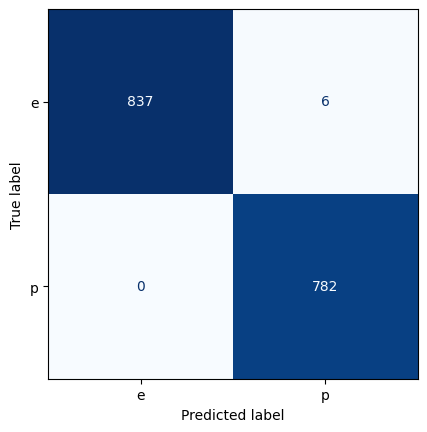

In [99]:
# plot confusion matrix using sklearn's ConfusionMatrixDisplay module
ConfusionMatrixDisplay.from_predictions(target_test, target_predicted, 
                                        display_labels=tree_model.classes_,
                                        colorbar=False, 
                                        cmap="Blues")
plt.show()

Create a visualization of the decision tree.

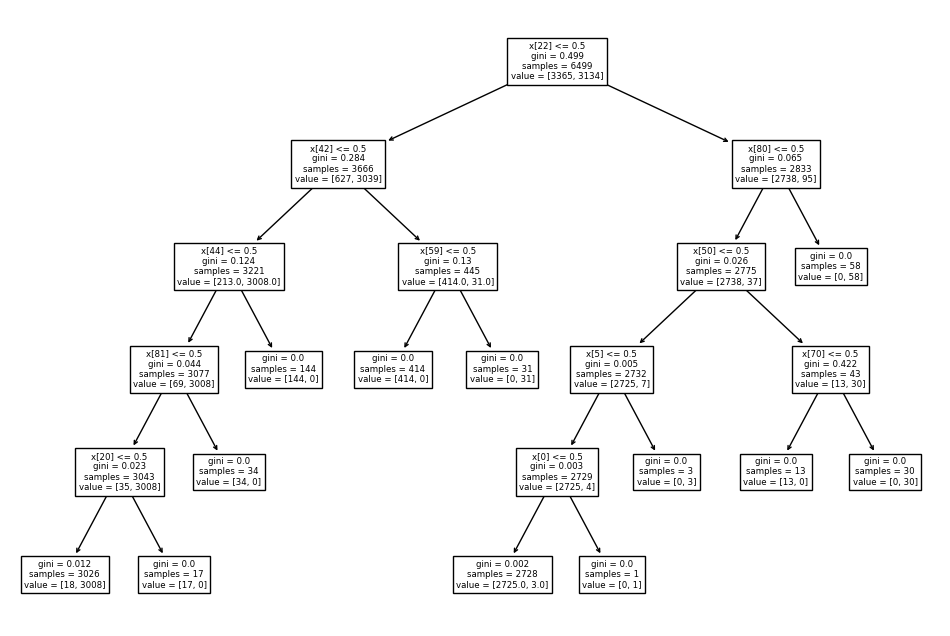

In [100]:
# plot the decision tree for vizualization
plt.figure(figsize=(12, 8))
plot_tree(tree_model)
plt.show()

Use a χ2-statistic selector to pick the five best features for this data.

In [101]:
# create a chi square selector for 5 best features
chi2_selector = SelectKBest(chi2, k=5)

In [102]:
#extract best features
chi2_selector.fit(features_train, target_train)
best_features_train = chi2_selector.transform(features_train)

In [103]:
print(f"Original number of features: {features_train.shape[1]}")
print(f"Selected number of features: {best_features_train.shape[1]}")

Original number of features: 95
Selected number of features: 5


Which five features were selected in step 7? Hint: Use the get_support function.

In [104]:
# Get index of features that were selected using get_support() function
best_features_indices = np.where(chi2_selector.get_support() == True)

In [105]:
# extract feature names using indices
[features_train.columns[idx] for idx in best_features_indices]

##ask professor whether to choose dummied features?

[Index(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
        'stalk-surface-below-ring_k'],
       dtype='object')]

Repeat steps 4 and 5 with the five best features selected in step 7.

In [106]:
# create decision tree classifier with 5 best features and fit train set
best_features_dtree = DecisionTreeClassifier()
best_features_dtree_model = best_features_dtree.fit(best_features_train, target_train)

In [107]:
#apply chi seelctor to test set
best_features_test = chi2_selector.transform(features_test)

In [108]:
#predict target for test set
target_predicted_best_features = best_features_dtree_model.predict(best_features_test)

In [109]:
# get accuracy for test set
accuracy_score(target_test, target_predicted_best_features)

0.9735384615384616

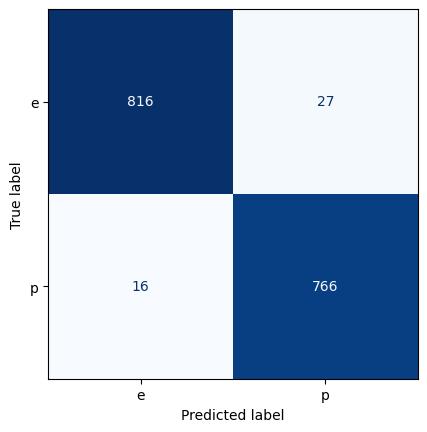

In [110]:
# plot confusion matrix using sklearn's ConfusionMatrixDisplay module
ConfusionMatrixDisplay.from_predictions(target_test, target_predicted_best_features, 
                                        display_labels=best_features_dtree_model.classes_,
                                        colorbar=False, 
                                        cmap="Blues")
plt.show()

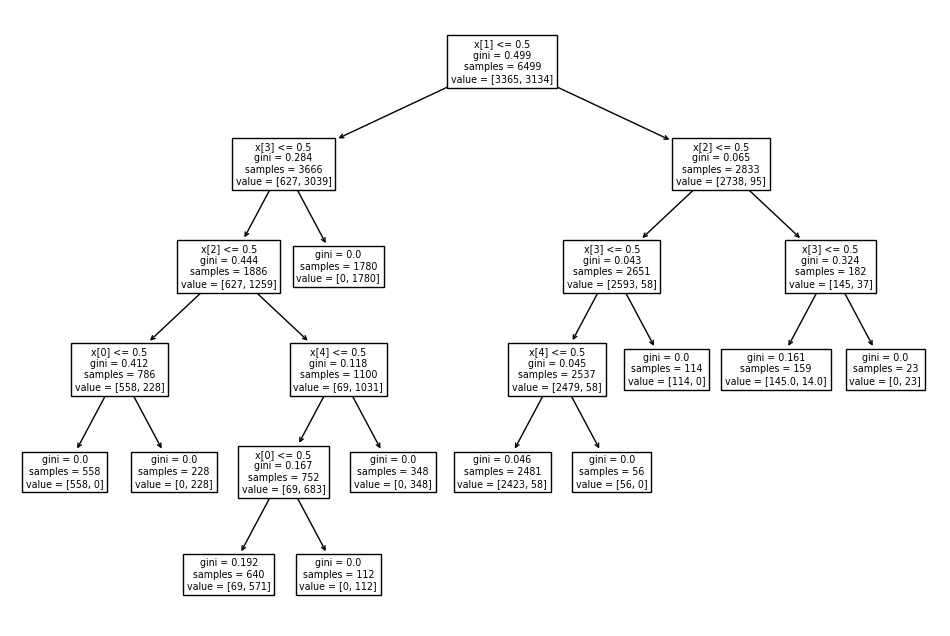

In [25]:
# plot the decision tree for vizualization
plt.figure(figsize=(12, 8))
plot_tree(best_features_dtree_model)
plt.show()

#### Summary

We observe that there is no significant difference in the accuracy of the model with selected $5$ features than the model with all the original features. Accuracy of the model with all features is $0.99$ and accuracy of the model with chi-sqaure sattistic slected five best features is $0.97$. This shows that not all the features in the dataset are not equally important in relation to the target. Chi-sqaure statistic was able to reduce the number of features without having much significant impact on the accuracy. 